# ¿Cómo medir rendimiento y riesgo en un portafolio? II

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.picpedia.org/clipboard/images/stock-portfolio.jpg" width="600px" height="400px" />

> La clase pasada y la presente, están dedicadas a obtener medidas de rendimiento y riesgo en un portafolio.

> Vimos que podemos obtener los rendimientos de un portafolio mediante la relación $r_p=\sum_{i=1}^{n}w_ir_i$, y una vez teniendo los rendimientos del portafolio, lo podemos tratar como un activo individual.

> Por otra parte, vimos que si conocemos los rendimientos esperados de cada activo que conforma el portafolio $E[r_i]$, podemos calcular el rendimiento esperado del portafolio como el promedio ponderado de los rendimientos esperados de los activos $E[r_p]=\sum_{i=1}^{n}w_iE[r_i]$.

> Sin embargo, vimos que esto no es válido para la medida de riesgo (desviación estándar). Es decir, la varianza (o volatilidad, o desviación estándar) no es el promedio ponderado de las varianzas individuales. Anticipamos que esto es clave en el concepto de **diversificación**.

**Objetivos:**
- Medir el riesgo en un portafolio a partir del riesgo de cada uno de los activos que lo conforman.

*Referencias*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Midiendo el riesgo en un portafolio

### 1.1. Volatilidad de un portafolio

Retomamos el ejemplo qur veníamos trabajando la clase pasada...

**Ejemplo.** Supongamos que tenemos inversión en activos de Toyota, Walmart y Pfizer. Tenemos cuatro posibles estados económicos:

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Creamos tabla
tabla = pd.DataFrame(columns=['Prob', 'Toyota', 'Walmart', 'Pfizer'], 
                     index=['Expansion', 'Normal', 'Recesion', 'Depresion'])
tabla.index.name = 'Estado'
tabla['Prob']=np.array([0.1, 0.4, 0.3, 0.2])
tabla['Toyota']=np.array([0.06, 0.075, 0.02, -0.03])
tabla['Walmart']=np.array([0.045, 0.055, 0.04, -0.01])
tabla['Pfizer']=np.array([0.025, -0.005, 0.01, 0.13])

tabla.round(4)

,Prob,Toyota,Walmart,Pfizer
Estado,,,,
Expansion,0.1,0.060,0.045,0.025
Normal,0.4,0.075,0.055,-0.005
Recesion,0.3,0.020,0.040,0.010
Depresion,0.2,-0.030,-0.010,0.130


In [3]:
## Rendimientos esperados
# Toyota
ErT = (tabla["Prob"] * tabla["Toyota"]).sum()
# Walmart
ErW = (tabla["Prob"] * tabla["Walmart"]).sum()
# Pfizer
ErP = (tabla["Prob"] * tabla["Pfizer"]).sum()
# Mostrar
ErT, ErW, ErP

(0.036, 0.036500000000000005, 0.029500000000000002)

In [4]:
## Volatilidad
# Toyota
sT = (tabla["Prob"] * (tabla["Toyota"] - ErT)**2).sum()**0.5
# Walmart
sW = (tabla["Prob"] * (tabla["Walmart"] - ErW)**2).sum()**0.5
# Pfizer
sP = (tabla["Prob"] * (tabla["Pfizer"] - ErP)**2).sum()**0.5
# Mostrar
sT, sW, sP

(0.04017461885320133, 0.02408837894089181, 0.05111017511220246)

In [5]:
# Portafolio 0.5Toyota+0.5Pfizer
tabla["PortTP"] = 0.5 * tabla["Toyota"] + 0.5 * tabla["Pfizer"]
tabla

,Prob,Toyota,Walmart,Pfizer,PortTP
Estado,,,,,
Expansion,0.1,0.060,0.045,0.025,0.0425
Normal,0.4,0.075,0.055,-0.005,0.0350
Recesion,0.3,0.020,0.040,0.010,0.0150
Depresion,0.2,-0.030,-0.010,0.130,0.0500


In [6]:
# Rendimiento portafolio (como activo individual)
ErTP = (tabla["Prob"] * tabla["PortTP"]).sum()
# Rendimiento portafolio (como suma ponderada de rendimientos individuales)
ErTP_ = 0.5 * ErT + 0.5 * ErP
ErTP, ErTP_

(0.03275, 0.03275)

In [7]:
# Volatilidad del portafolio
sTP = (tabla["Prob"] * (tabla["PortTP"] - ErTP)**2).sum()**0.5
sTP

0.012867109232457772

In [9]:
# Notar que sTP < 0.5 * sT + 0.5 * sP
# la volatilidad del portafolio siempre es menor
# a la suma ponderada de las volatilidades individuales
0.5 * sT + 0.5 * sP

0.045642396982701894

**Actividad.** Encontrar la volatilidad del portafolio formado $0.5$ Toyota y $0.5$ Walmart.

In [11]:
# Encontrar los rendimientos del portafolio en cada estado de la economía
tabla["PortTW"] = 0.5 * tabla["Toyota"] + 0.5 * tabla["Walmart"]
tabla

,Prob,Toyota,Walmart,Pfizer,PortTP,PortTW
Estado,,,,,,
Expansion,0.1,0.060,0.045,0.025,0.0425,0.0525
Normal,0.4,0.075,0.055,-0.005,0.0350,0.0650
Recesion,0.3,0.020,0.040,0.010,0.0150,0.0300
Depresion,0.2,-0.030,-0.010,0.130,0.0500,-0.0200


In [12]:
# Encontrar el rendimiento esperado del portafolio
ErTW = (tabla["Prob"] * tabla["PortTW"]).sum()
ErTW

0.036250000000000004

In [13]:
# Encontrar la volatilidad de Toyota, Walmart y el portafolio
sTW = (tabla["Prob"] * (tabla["PortTW"] - ErTW)**2).sum()**0.5
sTW

0.03164747225293041

In [14]:
# Notar que sTW < 0.5 * sT + 0.5 * sW
# la volatilidad del portafolio siempre es menor
# a la suma ponderada de las volatilidades individuales
0.5 * sT + 0.5 * sW

0.03213149889704657

### 1.2. Midiendo el co-movimiento entre instrumentos

- Una vez más, concluimos que la volatilidad (varianza) **NO** es el promedio ponderado de las varianzas individales.

- Por el contrario, la varianza de los rendimientos de un portafolio está afectada por el movimiento relativo de un activo individual respecto a otro.

- Por tanto, necesitamos definir las medidas de **covarianza** y **correlación**, que nos permiten evaluar las fluctuaciones relativas entre los activos.

#### Covarianza:

Es una medida el movimiento relativo entre dos instrumentos.

Matemáticamente, si tenemos dos activos $A_1$ y $A_2$ cuyos rendimientos son $r_1$ y $r_2$, respectivamente, entonces la covarianza de los rendimientos de los activos es

$$\text{cov}(r_1,r_2)=\sigma_{12}=\sum_{j=1}^{m}p_j(r_{1j}-E[r_1])(r_{2j}-E[r_2]).$$

$$\text{cov}(r_2,r_1)=\sigma_{21}=\sum_{j=1}^{m}p_j(r_{2j}-E[r_2])(r_{1j}-E[r_1]) = \sigma_{12}.$$

Podemos notar fácilmente que la covarianza de los rendimientos de un activo con los rendimientos del mismo activo corresponde a la varianza

$$\text{cov}(r_1,r_1)=\sigma_{11}=\sum_{j=1}^{m} p_j(r_{1j}-E[r_1])(r_{1j}-E[r_1])=\sigma_1^2=\text{var}(r_1).$$

**Ejemplo.** Calcular la covarianza entre los rendimientos de Toyota y Pfizer.

In [15]:
# Mostrar tabla
tabla

,Prob,Toyota,Walmart,Pfizer,PortTP,PortTW
Estado,,,,,,
Expansion,0.1,0.060,0.045,0.025,0.0425,0.0525
Normal,0.4,0.075,0.055,-0.005,0.0350,0.0650
Recesion,0.3,0.020,0.040,0.010,0.0150,0.0300
Depresion,0.2,-0.030,-0.010,0.130,0.0500,-0.0200


In [16]:
# Calcular la covarianza
covTP = (tabla["Prob"] * (tabla["Toyota"] - ErT) * (tabla["Pfizer"] - ErP)).sum()
covTP

-0.0017820000000000004

El signo negativo en la covarianza nos dice que los rendimientos se mueven de manera contraria:

In [17]:
from matplotlib import pyplot as plt

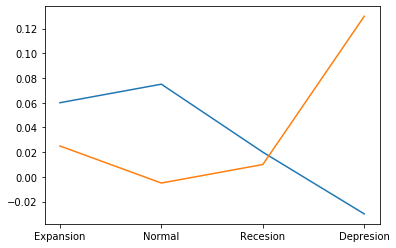

In [19]:
plt.plot(tabla.index, tabla["Toyota"])
plt.plot(tabla.index, tabla["Pfizer"])

**Actividad.** Calcular la covarianza entre los rendimientos de Toyota y Walmart.

In [21]:
# Calcular la covarianza
covTW = (tabla["Prob"] * (tabla["Toyota"] - ErT) * (tabla["Walmart"] - ErW)).sum()
covTW

0.0009060000000000001

El signo positivo en la covarianza nos dice que los rendimientos se mueven en sentidos similares:

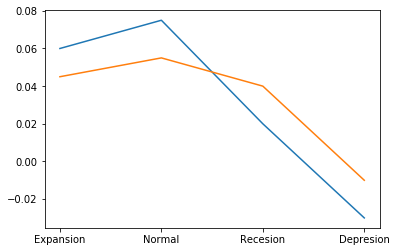

In [22]:
plt.plot(tabla.index, tabla["Toyota"])
plt.plot(tabla.index, tabla["Walmart"])

¿Qué nos dice este número?
- El signo nos dice las direcciones relativas entre los rendimientos de cada activo. Por ejemplo, la covarianza entre los rendimientos de Toyota y Pfizer es negativa... ver los rendimientos.
- La magnitud de la covarianza no nos dice mucho acerca de la fuerza con que se relacionan o no estos rendimientos.

**Correlación:**

Un posible problema de la covarianza es que la magnitud de esta medida no nos dice mucho acerca de la fuerza de los movimientos relativos. La *correlación* es una medida normalizada del movimiento relativo entre los rendimientos de dos activos.

Matemáticamente,

$$\text{corr}(r_1,r_2)=\rho_{12}=\rho_{21}=\frac{\sigma_{12}}{\sigma_1\sigma_{2}}.$$

$$\sigma_{12} = \rho_{12} \sigma_{1} \sigma_{2}$$

Propiedades:

- Podemos notar fácilmente que la correlación de los rendimientos de un activo con los rendimientos del mismo activo es $1$: $$\text{corr}(r_1,r_1)=\rho_{11}=\frac{\sigma_{11}}{\sigma_1\sigma_1}=\frac{\sigma_{1}^2}{\sigma_1\sigma_1}=1.$$
- El signo de la correlación y la covarianza es el mismo.
- La correlación satisface: $$-1\leq\rho_{12}\leq 1.$$

**Ejemplo.** Calcular la correlación entre los rendimientos de Toyota y Pfizer.

In [23]:
corrTP = covTP / (sT * sP)
corrTP

-0.8678577889660902

In [25]:
sTP, 0.5 * sT + 0.5 * sP

(0.012867109232457772, 0.045642396982701894)

**Actividad.** Calcular la correlación entre los rendimientos de Toyota y Walmart.

In [24]:
corrTW = covTW / (sT * sW)
corrTW

0.9362004766821975

In [26]:
sTW, 0.5 * sT + 0.5 * sW

(0.03164747225293041, 0.03213149889704657)

**Conclusión.**
- Es una medida normalizada de la fluctuación relativa de los rendimientos de dos activos.
- En los ejemplos que vimos, sería conveniente invertir en el portafolio de Toyota y Pfizer puesto que su correlación es negativa, y esto impactaría positivamente en la diversificación del riesgo.

___

## 2. Uniendo todo...

- Entonces, vimos mediante ejemplos que el riesgo en un portafolio se ve afectado significativamente por como los rendimientos de los activos se mueven relativamente.
- Este movimiento relativo lo medimos mediante la covarianza o la correlación.
- Si se mueven de una manera que no están perfectamente correlacionados ($\rho<1$), entonces el riesgo del portafolio siempre será menor que el promedio ponderado de los riesgos individuales.

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://www.publicdomainpictures.net/pictures/20000/velka/happy-child.jpg" width="300px" height="200px" />

## Ésta es la razón por la que combinar activos en un portafolio permite diversificar el riesgo...

Entonces, ¿cómo podemos incorporar esta medida en el cálculo de la varianza del portafolio? 
- <font color=blue> Ver en el tablero...</font>

$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik} = w^T \Sigma w
$$

- ¿Cómo sería para dos activos? ($\sigma_{12} = \rho_{12} \sigma_{1} \sigma_{2}$)

\begin{align}
\sigma_p^2 & = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \sigma_{12} \\
           & = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \rho_{12} \sigma_1 \sigma_2
\end{align}

**Ejemplo.** Calcular por fórmula para el portafolio de Toyota y Pfizer. Comparar.

In [27]:
sTP

0.012867109232457772

In [29]:
w1, w2 = 0.5, 0.5
sTP_ = (w1**2 * sT**2 + w2**2 * sP**2 + 2 * w1 * w2 * covTP)**0.5
sTP_

0.012867109232457763

**Actividad.** Calcular por fórmula para el portafolio de Toyota y Walmart. Comparar.

In [30]:
sTW

0.03164747225293041

In [31]:
w1, w2 = 0.5, 0.5
sTW_ = (w1**2 * sT**2 + w2**2 * sW**2 + 2 * w1 * w2 * covTW)**0.5
sTW_

0.03164747225293041

## 2.1. <font color=blue> Ver en el tablero...</font>
### Matriz de varianza covarianza.
### Matriz de correlación.

# Anuncios parroquiales

## 1. Recordar quiz la siguiente clase. Temas: Clases 6 y 7.
## 2. Tarea: revisar archivo "Tarea4_MidiendoRendimientoRiesgo" en clase. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>